## Training Profiling of LSTM Prefetcher

In [7]:
import os
import torch
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
matplotlib.rcParams.update({'font.size': 14})

batch_sizes = [1, 8, 64, 512]
threads = [1, 2, 4, 8]
plot_colors = ['b', 'r+', 'k.', 'y']

def plot_err(y_dats, y_err, yticks=None):
    # f, ax = plt.subplots()
    for y, e, l, c in zip(y_dats, y_err, threads[:len(y_dats)], plot_colors[:len(y_dats)]):
        if l == 1:
            label = "DNN FP32"
        else:
            label = "DNN FP32 " + str(l) + "T"
        ax.plot(batch_sizes, y, c , label=label)

def sv_fig(title, fname):
    plt.xlabel("Batch Size")
    plt.ylabel("Latency (\u03BCs)")
    plt.savefig("figs/" + fname, bbox_inches="tight")
    plt.show()

def get_data(fname):
    f = open(fname, 'r')
    data = np.array([float(l) for l in f.readlines()])
    f.close()
    return data

def get_dat_dir(dirname):
    data = []
    dir = os.fsencode(dirname)
    flist = os.listdir(dir)
    flist.sort(key=lambda x: os.stat(os.path.join(dir, x)).st_mtime)
    for f in flist:
        fname = dirname + "/" + os.fsdecode(f)
        data.append(get_data(fname))
    return data

### 1) 2.5k classes, 32 hidden dimensions, 32 embedding dimensions

In [8]:
dt1 = get_dat_dir("data/2p5k_EH32/t1")
dt2 = get_dat_dir("data/2p5k_EH32/t2")
data = [dt1, dt2]
data = [dt1]

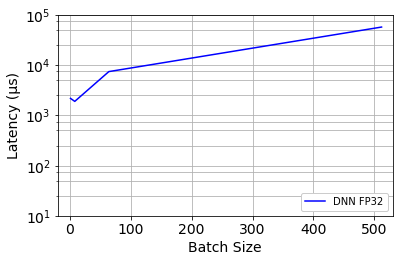

In [12]:
import matplotlib
import math

ydat = [[d.mean() for d in dt] for dt in data]
yerr = [[d.std() for d in dt] for dt in data]

cdat = torch.tensor([20.213, 19.996, 19.305, 17.986, 20.166])
cavg = cdat.mean()
cstd = cdat.std()
cplot = (torch.tensor([1,2,4,8]) * cavg).tolist()
cerr = (torch.tensor([1,2,4,8]) * cstd).tolist()

f, ax = plt.subplots(figsize=(6,3.7))

yticks=[10, 100, 1001, 10000, 100000]
min_ticks = [25, 50, 75, 250, 500, 750, 2500, 5000, 7500, 25000, 50000, 75000]
ax.set_ylim([10,1e5])
ax.set_yscale('log', base=10)
ax.set_yticks(yticks) # Grid
ax.set_yticks(min_ticks, minor=True)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda v,_: ("$10^{%d}$" % math.log(v,10)) ))
ax.set_xticks([0, 100, 200, 300, 400, 500])
ax.set_xlim([-20,530])
ax.grid(which='both')

# ax.plot(batch_sizes, cplot, color="m", label="Hebb INT32")

plot_err(ydat, yerr)
# plt.legend(loc=(1.01, 0), framealpha=1)
plt.rc('legend', fontsize=10) 
plt.legend(loc="lower right", framealpha=1)

sv_fig("Training Time for Learning Models", "training_lat.svg")

### 2) 10k classes, 32 hidden dimensions, 32 embedding dimensions

In [10]:
# dt1 = get_dat_dir("data/10k_EH32/t1")
# dt2 = get_dat_dir("data/10k_EH32/t2")
# dt4 = get_dat_dir("data/10k_EH32/t4")
# data = [dt1, dt2, dt4]

# ydat = [[d.mean() for d in dt] for dt in data]
# yerr = [[d.std() for d in dt] for dt in data]
# plot_err(ydat, yerr, "Training Time for C=10k, E=H=32",
#     "10k_EH32_train.jpeg")

### 3) 20k classes, 256 hidden dimensions, 256 embedding dimensions

In [11]:
# dt1 = get_dat_dir("data/20k_EH256/t1")
# dt2 = get_dat_dir("data/20k_EH256/t2")
# dt4 = get_dat_dir("data/20k_EH256/t4")
# data = [dt1, dt2, dt4]

# ydat = [[d.mean() for d in dt] for dt in data]
# yerr = [[d.std() for d in dt] for dt in data]
# yerr[0][3] /= 100
# plot_err(ydat, yerr, "Training Time for C=20k, E=H=256",
#     "20k_EH256_train.jpeg")